In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2023-05-27 18:33:03.269095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1853714018015879317
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23520407808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8929650562584139456
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6"
]


2023-05-27 18:33:04.660004: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 18:33:04.665829: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-27 18:33:04.666606: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-27 18:33:04.700884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-27 18:33:04.700909: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)      

1 Physical GPUs, 1 Logical GPUs


2023-05-27 18:33:05.202065: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-27 18:33:05.203062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-27 18:33:05.203103: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-05-27 18:33:05.203155: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-05-27 18:33:05.203173: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-05-27 18:33:05.203184: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.s

In [3]:
import tensorflow as tf
tf.random.set_seed(42)

import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import load_model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

from PIL import Image

In [4]:
import zipfile
zipfile.ZipFile('train.zip').extractall()

In [4]:
def show_img_dataset(X, y=None, nrows = 4, ncols=4, firstimg=100, numimg=4):
    for i in range(numimg):
        sp = plt.subplot(nrows, ncols, i + 1)

        sp.axis('Off')
        plt.imshow(X[firstimg+i], cmap="Greys")
        if (y is not None): 
            plt.title(y[firstimg+i])    
    plt.show()

In [5]:
def show_pairs(X, y, image):
    sp = plt.subplot(1, 2, 1)
    plt.imshow(X[image][0], cmap="Greys")
    sp = plt.subplot(1, 2, 2)
    plt.imshow(X[image][1], cmap="Greys")
    plt.figtext(0.5, 0.01, str(y[image]), wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

In [6]:
import os
img_dir = os.listdir('../siamese-net/content/sign_data')
img_dir

['019',
 '015_forg',
 '018',
 '017_forg',
 '009_forg',
 '013_forg',
 '014_forg',
 '016_forg',
 '013',
 '019_forg',
 '006_forg',
 '004',
 '012',
 '015',
 '002_forg',
 '018_forg',
 '020',
 '003',
 '001_forg',
 '020_forg',
 '014',
 '012_forg',
 '002',
 '003_forg',
 '004_forg',
 '006',
 '016',
 '017',
 '001',
 '009',
 '021_forg',
 '023_forg',
 '025_forg',
 '023',
 '024_forg',
 '026_forg',
 '024',
 '022',
 '025',
 '028_forg',
 '030_forg',
 '028',
 '027',
 '031',
 '022_forg',
 '026',
 '034',
 '027_forg',
 '035_forg',
 '033_forg',
 '021',
 '029',
 '031_forg',
 '029_forg',
 '030',
 '032',
 '032_forg',
 '067_forg',
 '059_forg',
 '036',
 '041',
 '036_forg',
 '062',
 '059',
 '039',
 '040',
 '033',
 '063',
 '040_forg',
 '039_forg',
 '035',
 '043_forg',
 '069_forg',
 '068',
 '037',
 '062_forg',
 '063_forg',
 '037_forg',
 '058_forg',
 '060',
 '044_forg',
 '066',
 '064',
 '060_forg',
 '065_forg',
 '046_forg',
 '069',
 '061_forg',
 '068_forg',
 '045',
 '067',
 '046',
 '065',
 '064_forg',
 '061',
 '041

In [7]:
label = 0
train_data_list = []
train_label_list = []

for i in img_dir:
    for j in os.listdir(f'/home/jovyan/test_jh/train/{i}'):
        
        filename = f'/home/jovyan/test_jh/train/{i}/' + j
        #print(filename)
        image = Image.open(filename)
        #print(image)
        image = image.convert("L")
        image = np.array(image)
        image = np.expand_dims(image, axis=-1)
        image = tf.image.resize(image, (100, 100))
        train_data_list.append(image)    
        train_label_list.append(label)
        #except:
            #print('error!!!!!')
    label += 1

In [8]:
len(train_data_list), len(train_label_list)

(1649, 1649)

In [9]:
np.unique(train_label_list)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [10]:
x_train = np.array(train_data_list)
y_train = np.array(train_label_list)
x_train.shape, y_train.shape

((1649, 100, 100, 1), (1649,))

In [11]:
#Normalize the data. 
x_train = x_train.astype('float32') / 255

In [12]:
y_train

array([  0,   0,   0, ..., 127, 127, 127])

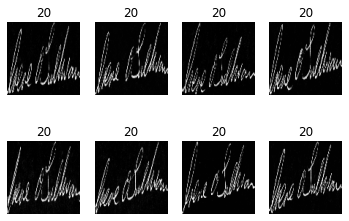

In [13]:
show_img_dataset(x_train, y_train, firstimg=300, nrows = 2, ncols=4, numimg=8)

In [14]:
shuffled_indices= np.random.permutation(len(x_train))
shuffled_indices

array([ 118,   48,  740, ..., 1634, 1507, 1066])

In [15]:
# 인덱스를 섞은 배열을 생성합니다.
shuffled_indices = np.random.permutation(len(x_train))

# 인덱스를 기반으로 x_train과 y_train을 섞습니다.
shuffled_x_train = x_train[shuffled_indices]
shuffled_y_train = y_train[shuffled_indices]

In [16]:
X_train = shuffled_x_train
y_train = shuffled_y_train

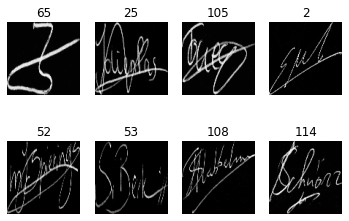

In [17]:
show_img_dataset(X_train, y_train, firstimg=56, nrows = 2, ncols=4, numimg=8)

In [18]:
def create_pairs(X, y, min_equals = 600):
    pairs = []
    labels = []
    equal_items = 0
    
    #index with all the positions containing a same value
    # Index[1] all the positions with values equals to 1
    # Index[2] all the positions with values equals to 2
    #.....
    # Index[9] all the positions with values equals to 9 
    index = [np.where(y == i)[0] for i in range(128)]
    
    for n_item in range(len(X)): 
        if equal_items < min_equals:
            #Select the number to pair from index containing equal values. 
            #print(n_item)
            num_rnd = np.random.randint(len(index[y[n_item]]))
            num_item_pair = index[y[n_item]][num_rnd]

            equal_items += 1
        else: 
            #Select any number in the list 
            num_item_pair = np.random.randint(len(X))
            
        #I'm not checking that numbers is different. 
        #That's why I calculate the label depending if values are equal. 
        labels += [int(y[n_item] == y[num_item_pair])]         
        pairs += [[X[n_item], X[num_item_pair]]]
            
    return np.array(pairs), np.array(labels).astype('float32') 

In [19]:
training_pairs, training_labels = create_pairs(X_train, y_train, min_equals=450)

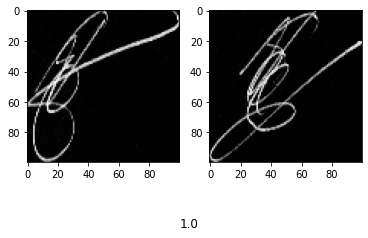

In [20]:
#Different pair of the training set labeled with a 0. 
show_pairs(training_pairs, training_labels,200)

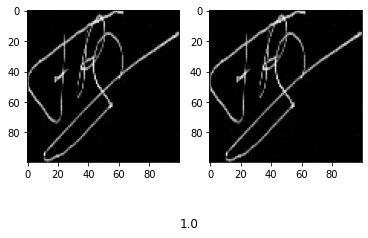

In [21]:
#Same pair of the training set labeled with a 1. 
show_pairs(training_pairs, training_labels, 30)

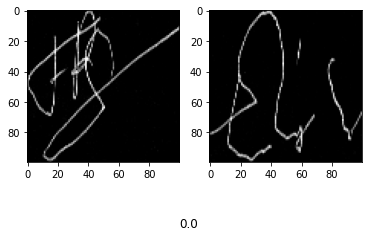

In [22]:
#Same pair of the training set labeled with a 1. 
show_pairs(training_pairs, training_labels, 999)

In [23]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [24]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [25]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
def initialize_base_branch():
    inputs = Input(shape=(100,100,1), name="base_input")
    
    # define the first set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    # second set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    pooledOutput = GlobalAveragePooling2D()(x)
    outputs = Dense(128)(pooledOutput)

    #Returning a Model, with input and outputs, not just a group of layers. 
    return Model(inputs=inputs, outputs=outputs)

base_model = initialize_base_branch()

In [26]:
#Input for the left part of the pair. We are going to pass training_pairs[:,0] to his layer. 
input_l = Input(shape=(100, 100,), name='left_input')
#ATENTION!!! base_model is not an function, is model and we are adding our input layer. 
vect_output_l = base_model(input_l)

#Input layer for the right part of the siamse model. Will receive: training_pairs[:,1]
input_r = Input(shape=(100, 100,), name='right_input')
vect_output_r = base_model(input_r)

#The lambda output layer calling the euclidenan distances, will return the difference between both vectors
output = Lambda(euclidean_distance, name='output_layer', 
                output_shape=eucl_dist_output_shape)([vect_output_l, vect_output_r])

#Our model have two inputs and one output. Each of the inputs contains the commom model. 
model = Model([input_l, input_r], output)

In [27]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1),
              optimizer=rms)
history = model.fit(
    [training_pairs[:,0], training_pairs[:,1]], 
    training_labels, epochs=15, 
    batch_size=4)

2023-05-27 18:33:28.369516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-05-27 18:33:28.394053: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/15


2023-05-27 18:33:29.052556: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-05-27 18:33:29.765178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-05-27 18:33:29.769371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


 14/413 [>.............................] - ETA: 3s - loss: 0.3838  

2023-05-27 18:33:31.837662: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


413/413 [==============================] - 7s 8ms/step - loss: 0.2210
Epoch 2/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1920
Epoch 3/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1879
Epoch 4/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1529
Epoch 5/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1393
Epoch 6/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1354
Epoch 7/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1342
Epoch 8/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1332
Epoch 9/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1249
Epoch 10/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1062
Epoch 11/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1200
Epoch 12/15
413/413 [==============================] - 3s 8ms/step - loss: 0.1266
Epoch 13/15
413/413 [===============

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_input (InputLayer)         [(None, 100, 100)]   0                                            
__________________________________________________________________________________________________
right_input (InputLayer)        [(None, 100, 100)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 128)          41536       left_input[0][0]                 
                                                                 right_input[0][0]                
__________________________________________________________________________________________________
output_layer (Lambda)           (None, 1)            0           model[0][0]                

In [28]:
def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [29]:
y_pred_train = model.predict([training_pairs[:,0], training_pairs[:,1]])
train_accuracy = compute_accuracy(training_labels, y_pred_train)

print("Train Accuracy = {} ".format(train_accuracy))

Train Accuracy = 0.8690115221346271 


In [30]:
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 100, 100])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [100, 100*n])
    plt.imshow(left, cmap='Greys')
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([100*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 100, 100])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [100, 100*n])
    plt.imshow(right, cmap='Greys')

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


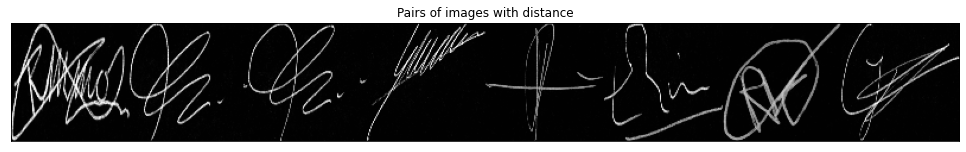

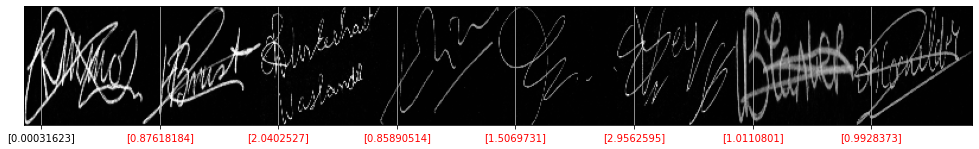

In [31]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               training_labels[indexes], 
               "Pairs of images with distance", 8)

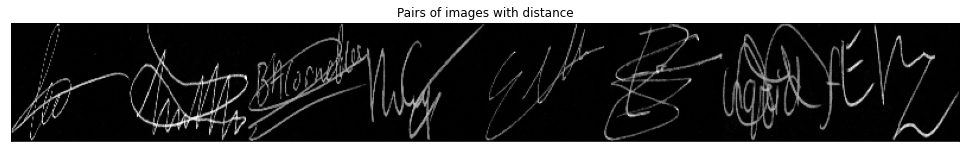

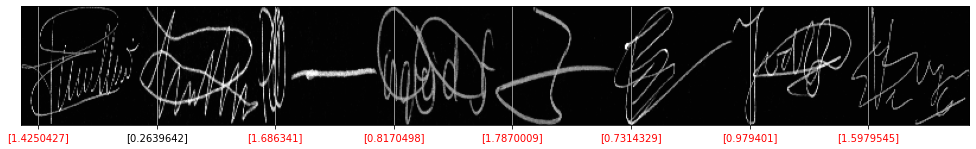

In [33]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               
               training_labels[indexes], 
               "Pairs of images with distance", 8)

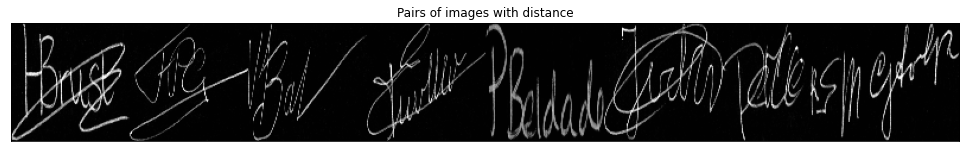

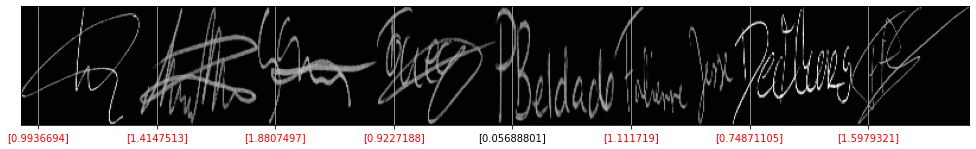

In [34]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               
               training_labels[indexes], 
               "Pairs of images with distance", 8)

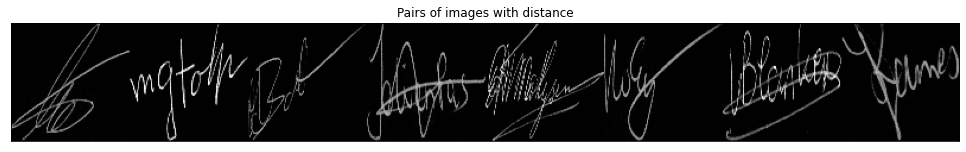

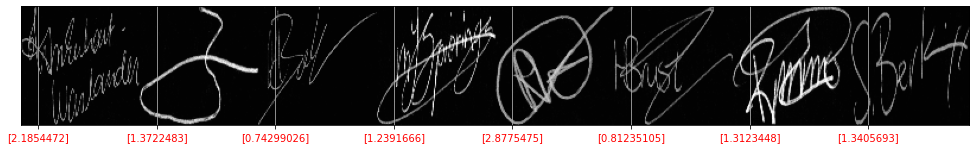

In [35]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               
               training_labels[indexes], 
               "Pairs of images with distance", 8)

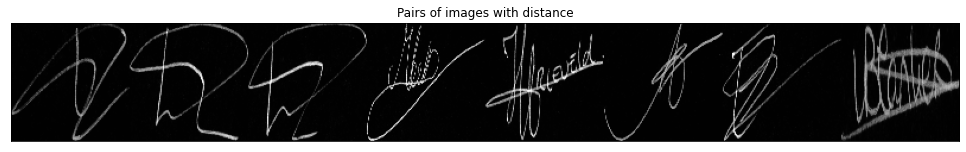

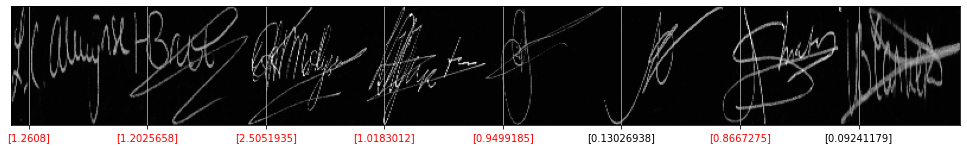

In [36]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               
               training_labels[indexes], 
               "Pairs of images with distance", 8)

In [37]:
model.save('sign_compare.h5')

In [38]:
import os
os.getcwd()

'/home/jovyan/test_jh'

In [40]:
os.listdir()

['toTensorflow.ipynb',
 '.ipynb_checkpoints',
 'train.zip',
 'toTensorflow2.ipynb',
 'kaggle_siamese.ipynb',
 'train',
 'siamese_model.h5',
 'sign_compare.h5',
 'test']

In [44]:
test_dir = '../siamese-net/content/sign_data'
os.listdir(test_dir)

['j3_converted.png', 'j1_converted.png', 'j2_converted.png']

In [47]:
test_data_list = []

for i in os.listdir(test_dir):
    filename = f'../siamese-net/content/sign_data{i}'
    #print(filename)
    image = Image.open(filename)
    #print(image)
    image = image.convert("L")
    image = np.array(image)
    image = np.expand_dims(image, axis=-1)
    image = tf.image.resize(image, (100, 100))
    test_data_list.append(image)   
    
x_test = np.array(test_data_list)
x_test.shape

(3, 100, 100, 1)

In [54]:
y_pred_test = model.predict([x_test[0], x_test[0]])

ValueError: in user code:

    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/keras/layers/pooling.py:295 call
        outputs = self.pool_function(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4606 max_pool
        return gen_nn_ops.max_pool(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/ops/gen_nn_ops.py:5327 max_pool
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/jovyan/.venv/horovod0.22.1-tf2.4.0-torch1.8.0-py3.8-cuda11.1/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node model_1/model/max_pooling2d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](model_1/model/conv2d/Relu)' with input shapes: [?,100,1,64].


In [53]:
x_test[0].shape

(100, 100, 1)

In [ ]:
y_pred_train = model.predict([training_pairs[:,0], training_pairs[:,1]])


(8, 100, 100, 1)

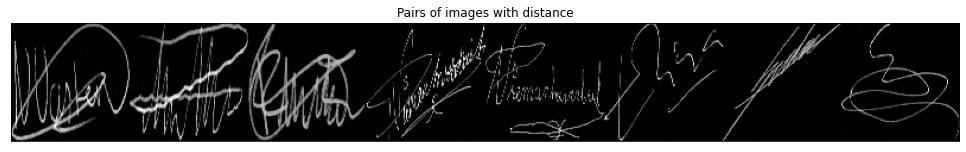

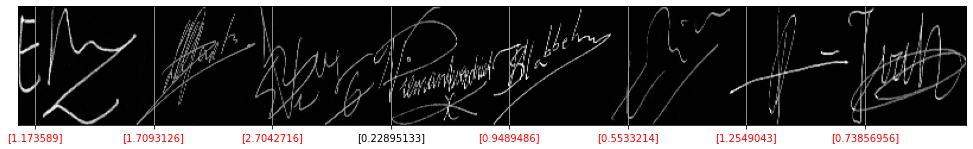

In [55]:
indexes = np.random.choice(len(y_pred_train), size=8)
display_images(training_pairs[:, 0][indexes], 
               training_pairs[:, 1][indexes], 
               y_pred_train[indexes], 
               
               training_labels[indexes], 
               "Pairs of images with distance", 8)

training_pairs[:, 0][indexes].shape

In [57]:
indexes

array([1565,  490,  521,  429,  839,   35, 1159, 1051])

In [56]:
training_pairs[:, 0][indexes].shape

(8, 100, 100, 1)

In [58]:
training_pairs[:, 1][indexes].shape

(8, 100, 100, 1)

In [59]:
y_pred_train[1565]

array([1.173589], dtype=float32)

In [61]:
training_pairs[:,0]

array([[[[0.9843137 ],
         [0.9843137 ],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]],

        [[0.9843137 ],
         [0.98347634],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]],

        [[0.9843137 ],
         [0.9843137 ],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]],

        ...,

        [[0.9843137 ],
         [0.9843137 ],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]],

        [[0.9843137 ],
         [0.9843137 ],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]],

        [[0.9843137 ],
         [0.9843137 ],
         [0.9843137 ],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.9843137 ]]],


       [[[0.9843137 ],
         [0.9831985 ],
         [0.98